# Work with CSVs

Data from https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/data
*QUESTIONS MARKED WITH ASTERISKS

Assess factors with strongest predictive value for loan amount via kiva crowdfunding platform

- Have multiple CSVs that would make up a relational database (Excel currently crashing on my old computer because file is so big, but I am going to import relevant data based on the unique key [Loan ID] to create new columns in a master CSV file)
    - Loan data
    - Loan themes
    - Loan region locations
- External data
    - Human Development Index - how "developed" are the regions where the loans are granted?
        - Limitations: Using the HDI Index as a whole - not looking at detailed other indices/factors that go into the overall HDI
        - Also, only available by nation; each region could be unique
    - Conflict Index - is the exact region identified in the loan in the ACLED Conflict data?
        - *How problematic could it be if the region is spelled differently in its translation into the English alphabet?
        - *Should I instead do a plus or minus based on longitude/latitude?
        - *How do I establish a data dictionary for the data?  I have it from kaggle, would like it to be in my code
        - *Different of timing of kiva loan data and conflict data - compare to having been in ACLED conflict data within past few years?  Do I need to compare it with year of getting the kiva loan?

GENERAL QUESTIONS:
- *How deal with severe skew in data (do only < 2K or 5K?)?  In multiple segments (0-2, 2-11, 1-40, 40-100K?)?  Logistic regression?

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
import pandas as pd
import numpy as np
#kiva = pd.read_csv('C:\Users\carol_000\Documents\DSDC26'\kiva_loans.csv)
kiva = pd.read_csv('kiva_loans.csv')

In [4]:
kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,1/1/2014
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,1/1/2014
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,1/1/2014
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,1/1/2014
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,1/1/2014


In [6]:
kiva.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,NaN,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,NaN,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,NaN,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [7]:
kiva.describe(include=['object'])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666977,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424913,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,3/20/2017
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


# Checking Distribution

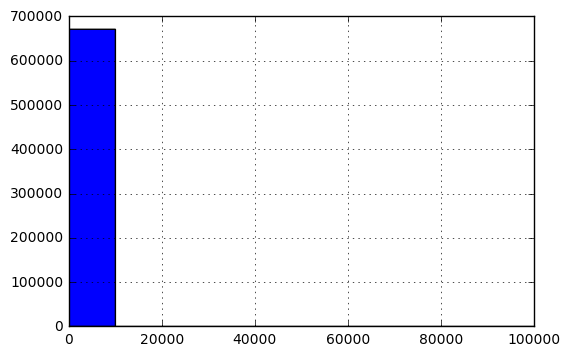

In [16]:
kiva.loan_amount.hist()

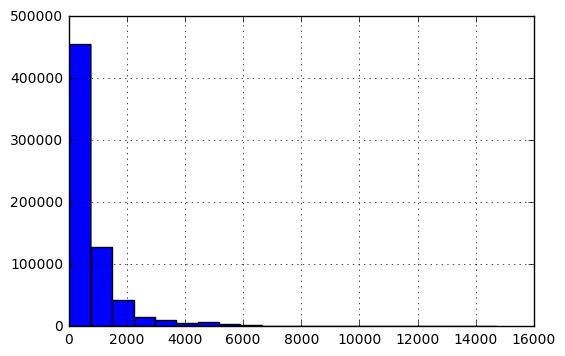

In [15]:
kiva[kiva.loan_amount<15000].loan_amount.hist(bins=20)

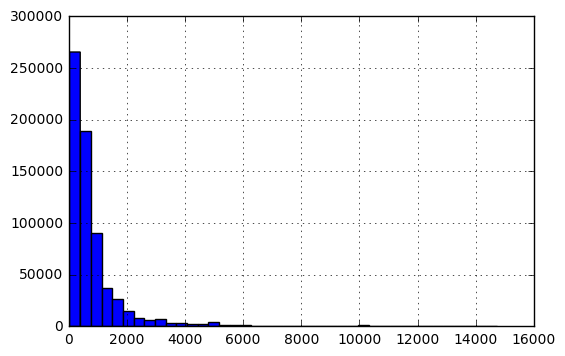

In [17]:
kiva[kiva.loan_amount<15000].loan_amount.hist(bins=40)

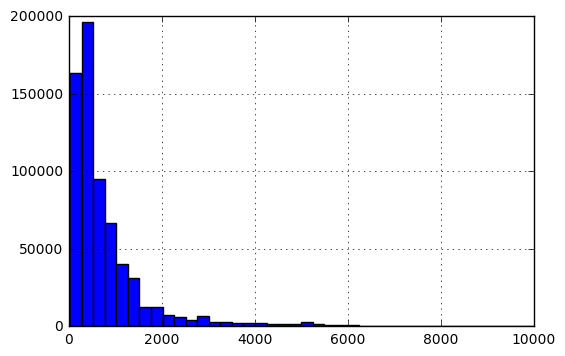

In [18]:
kiva[kiva.loan_amount<10000].loan_amount.hist(bins=40)

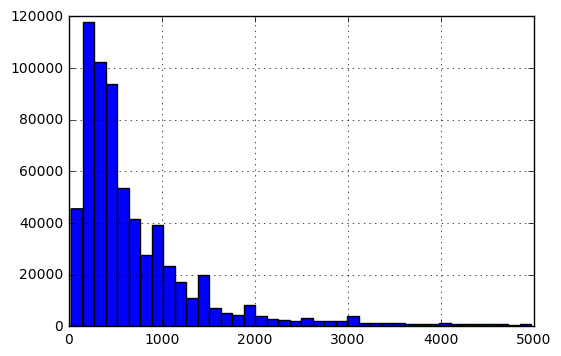

In [19]:
kiva[kiva.loan_amount<5000].loan_amount.hist(bins=40)

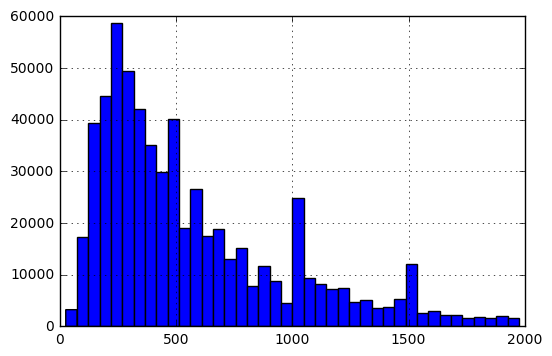

In [21]:
kiva[kiva.loan_amount<2000].loan_amount.hist(bins=40)

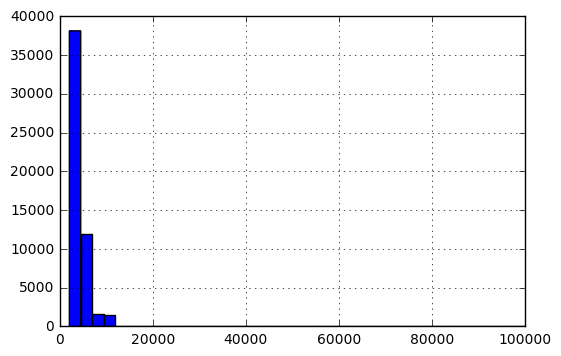

In [24]:
kiva[kiva.loan_amount>2000].loan_amount.hist(bins=40)

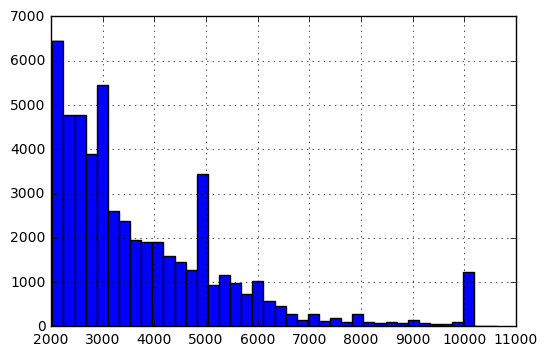

In [28]:
kiva[(kiva.loan_amount>2000) & (kiva.loan_amount<11000)].loan_amount.hist(bins=40)

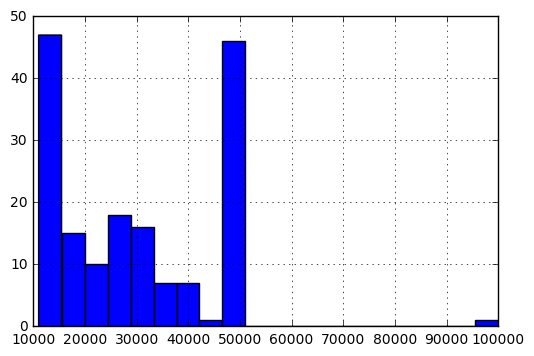

In [31]:
kiva[kiva.loan_amount>11000].loan_amount.hist(bins=20)

In [12]:
print(kiva.dtypes)

id                      int64
funded_amount           int64
loan_amount             int64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months          int64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object


I likely only care about
- loan amount (maybe look at funded amount - trying to determine why the difference between funded and loan amount)
- activity
- sector
- (only use if can do language processing, so probably not)
- country
- (only region if can figure out how to deal w/ different spellings)
- term_in_months
- borrower_genders
- repayment_interval
- (date only if want to compare w/ conflict - compare year only with ACLED data?  Same year?)

# Checking for Null Values

In [33]:
kiva.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4228
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

# Column Metadata (from Kaggle competition)
https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/data

id
Unique ID for loan

Numeric
funded_amount
The amount disbursed by Kiva to the field agent(USD)

Numeric
loan_amount
The amount disbursed by the field agent to the borrower(USD)

Numeric
activity
More granular category

Numeric
sector
High level category

String
use
Exact usage of loan amount

String
country_code
ISO country code of country in which loan was disbursed

String
country
Full country name of country in which loan was disbursed

String
region
Full region name within the country

String
currency
The currency in which the loan was disbursed

Numeric
partner_id
ID of partner organization

String
posted_time
The time at which the loan is posted on Kiva by the field agent

DateTime
disbursed_time
The time at which the loan is disbursed by the field agent to the borrower

DateTime
funded_time
The time at which the loan posted to Kiva gets funded by lenders completely

DateTime
term_in_months
The duration for which the loan was disbursed in months

Numeric
lender_count
The total number of lenders that contributed to this loan

Numeric
tags
Help us describe this column...
String
borrower_genders
Comma separated M,F letters, where each instance represents a single male/female in the group

String
repayment_interval
Help us describe this column...
String
date
Help us describe this column...
DateTime

In [5]:
#In order to do this, need to learn how to set up the data for use in scikit learn - how establish feature_names?
#Target?  Numpy matrix?
#X = pd.DataFrame(kiva,
                 #columns=kiva.feature_names)
#y = pd.DataFrame(kiva.target,
                 #columns=['loan_amount'])

#print(kiva['DESCR'])

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
#IGNORE FOR NOW - this might help me set my target attributes
# load the CSV file as a numpy matrix
#dataset = np.loadtxt(raw_data, delimiter=",")
#print(dataset.shape)
# separate the data from the target attributes
#X = dataset[:,0:7]
#y = dataset[:,8]

In [ ]:
#don't run this, just use as a reference on how to import CSV - earlier, I had problems with the filepath
#movies = pd.read_csv('./data/imdb_1000.csv')
#movies.head()